In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import neighbors
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn import decomposition
import scipy

In [2]:
ls

Loan_Lending.xlsx                     iris_dataset.ipynb
Loan_Lending.xlsx.html                loan_lending_test.csv
app.ipynb                             loan_lending_training.csv
breast_cancer.ipynb                   model.pkl
data.csv                              model1.pkl
datascience_assignment1_Hudson.ipynb  ~$Loan_Lending.xlsx


In [3]:
df = pd.read_csv("loan_lending_training.csv", delimiter="\t")

In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.691659,-0.652790,-0.049005,-0.992901,0.461282,-0.522476,0.627203,-0.111402,-1.391439,0.461624,...,0.186351,0.220324,0.962403,0.211196,-0.448557,-0.282338,-0.050773,0.414337,0.289161,0
1,2.057930,-0.327732,-2.726419,-0.775523,2.454901,3.198474,-0.451752,0.733267,0.487501,0.029346,...,-0.169675,0.256416,0.789349,0.040269,0.738357,0.289607,-0.080795,0.002805,-0.064285,0
2,-0.774357,1.638656,-1.143463,-0.506452,0.236317,-0.799485,0.281419,0.678773,-0.195950,-0.439228,...,-0.077158,0.416904,1.257168,0.008775,0.641379,-0.663886,-0.234363,0.365419,0.261844,0
3,0.012269,0.802441,0.990714,-0.004216,0.325432,-0.628611,0.809701,-0.329060,0.088218,-0.888044,...,0.157035,-0.154159,-0.139545,0.163508,-0.037869,-1.277592,-0.117425,0.075384,0.045599,0
4,2.048757,-0.015349,-1.054279,0.404162,-0.050640,-1.110941,0.222672,-0.350873,0.430366,0.042347,...,-0.178935,-0.273451,-0.617759,0.335898,0.006685,-0.290009,0.198355,-0.063349,-0.058477,0


In [89]:
#Preprocessing the data

In [5]:
dfnorm = pd.DataFrame(preprocessing.scale(df))

In [6]:
dfnorm.columns = df.columns

In [7]:
dfnorm.drop(['Class'], inplace=True, axis=1)
PCAlist = dfnorm.columns

In [8]:
dfnorm['Class'] = df['Class']
dfnorm.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.097980,-0.636391,0.481541,-0.728259,0.311506,-0.052033,0.401090,-0.080121,-0.410848,0.518142,...,0.125360,0.020786,0.887457,0.218992,-0.775609,-0.314379,-0.134104,0.485047,0.766174,0
1,0.736993,-0.522283,-0.096268,-0.648954,0.909504,2.195523,0.164915,0.161169,0.577427,0.397881,...,-0.291351,0.038890,0.715055,0.023163,1.338780,0.618353,-0.198954,-0.055866,-0.213891,0
2,0.078761,0.167999,0.245347,-0.550790,0.244027,-0.219353,0.325401,0.145602,0.217949,0.267522,...,-0.183064,0.119395,1.181112,-0.012918,1.166023,-0.936610,-0.530670,0.420749,0.690429,0
3,0.261575,-0.125546,0.705921,-0.367562,0.270757,-0.116141,0.441038,-0.142298,0.367414,0.142659,...,0.091047,-0.167064,-0.210342,0.164357,-0.044002,-1.937447,-0.278078,0.039531,0.090805,0
4,0.734862,-0.412624,0.264594,-0.218575,0.157952,-0.407481,0.312541,-0.148529,0.547375,0.401498,...,-0.302189,-0.226903,-0.686755,0.361863,0.035366,-0.326888,0.404027,-0.142818,-0.197787,0


In [9]:
#We will be doing a grid search to determine how many PCA components and
#the ideal number of neighbors for the KNN classifier

kvec = np.arange(1,10,1)  #list with the number of neighbors we will try

pcavec = np.arange(5,20,1) #list with the possible numbers of PCA components we will use

#train/test splitting
#X_train, X_test, y_train, y_test = train_test_split(dfnorm[PCAlist], dfnorm['Class'], test_size = 0.3)

In [10]:
training_score = []
test_score = []

k_list = []
pca_n_list = []
for k in kvec:
    for pca_n in pcavec:
        
        columns = df.columns[0:pca_n]  #columns to be used for training
        
        X_train, X_test, y_train, y_test = train_test_split(dfnorm[columns], dfnorm['Class'], test_size = 0.3)
        
        knn = neighbors.KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train) #fit model according to training set
        
        #now lets register the scores
        training_score.append(knn.score(X_train, y_train))
        test_score.append(knn.score(X_test, y_test))
        k_list.append(k)
        pca_n_list.append(pca_n)

In [11]:
#Determining the best k and pca_n according to the *test set*

#The test set is truly playing the role of validation set in our case.
#The proper thing to do would be to split the data in three parts: training, validation and test sets.


max_ind = test_score.index(max(test_score)) #finds the index leading the maximum test score

#Let's print the corresponding k and pca_n

print("The ideal number of neighbours according to our gridsearch is "+str(k_list[max_ind]))
print("The ideal number of PCA components according to our gridsearch is "+str(pca_n_list[max_ind]))
print("The score with the training (really validation) set is "+str(training_score[max_ind]))
print("The score with the test set is "+str(test_score[max_ind]))


The ideal number of neighbours according to our gridsearch is 5
The ideal number of PCA components according to our gridsearch is 18
The score with the training (really validation) set is 0.964722822174
The score with the test set is 0.981543624161


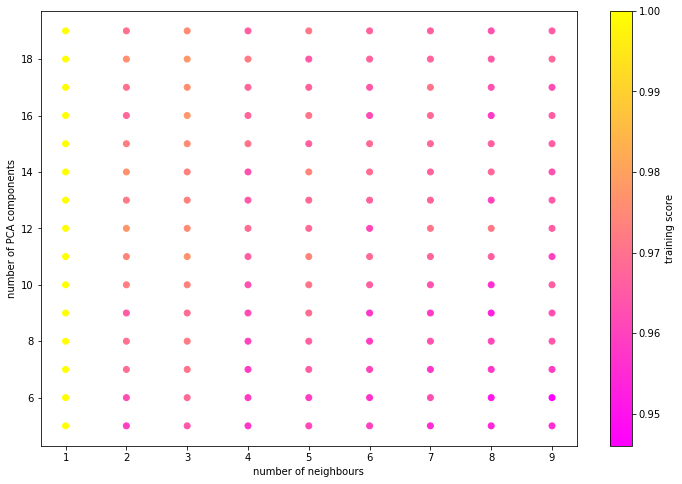

In [12]:
plt.figure(figsize =(12,8))
plt.scatter(k_list, pca_n_list, c=training_score, cmap='spring')
plt.colorbar(label='training score')
plt.xlabel('number of neighbours')
plt.ylabel('number of PCA components')
plt.show()

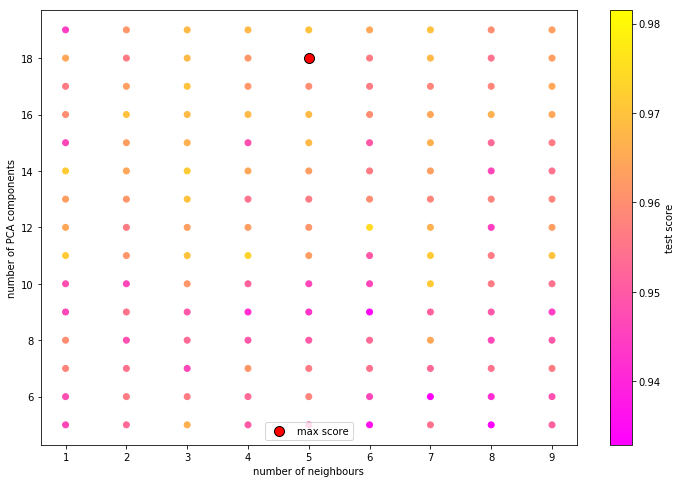

In [13]:
plt.figure(figsize =(12,8))
plt.scatter(k_list, pca_n_list, c=test_score, cmap='spring')
plt.colorbar(label='test score')
plt.xlabel('number of neighbours')
plt.ylabel('number of PCA components')
plt.scatter(k_list[max_ind], pca_n_list[max_ind], c='red', s=100, edgecolors = 'black', label="max score")
plt.legend()
plt.show()

Concluding Remarks:

We performed a gridsearch to find the best number of neighbours withing the KNN model (k), and the optimal number of PCA components (pca_n) to be used.

We got an accuracy of approximately 96-97% over many runs.

Next steps would be to invest some time in a cross-validation scheme to determine an interval for k and pca_n, and the corresponding score fluctuations. 

In [14]:
columns = df.columns[0:pca_n_list[max_ind]]  #columns to be used for training
        
X_train, X_test, y_train, y_test = train_test_split(dfnorm[columns], dfnorm['Class'], test_size = 0.3)
        
knn = neighbors.KNeighborsClassifier(n_neighbors=k_list[max_ind])
knn.fit(X_train, y_train) #fit model according to training set

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
knn.score(X_test, y_test)

0.95805369127516782

In [19]:
dftest = pd.read_csv("loan_lending_test.csv", delimiter = "\t")

In [21]:
dftest

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,...,-0.571605,3.490065,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.804110
1,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,0.120908,...,-0.283278,-0.153997,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.209444
2,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,...,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,-0.210432
3,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,...,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.133151
4,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,...,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.132049
5,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,...,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.220409
6,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,-0.160680
7,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.396266
8,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,0.115432
9,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.388062


In [23]:
knn.predict(dftest[columns])

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0])